# Crime in Seattle - notebook for 4th Dubstech Hackathon, 2-18-23

### Import data and packages

In [123]:
import pandas as pd

In [124]:
Seattle_pop = pd.read_csv('Seattle_Population_Data.csv')
SPD_data = pd.read_csv('SPD_Crime_Data__2008-Present.csv')
Tacoma_data = pd.read_csv('Tacoma_Crime_Extract_(SS911).csv')
Call_911_data = pd.read_csv('Call_Data.csv')

In [125]:
SPD_data['Crime Against Category'].unique()

array(['SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME'], dtype=object)

In [126]:
import plotly.graph_objects as go
import plotly.express as px

In [127]:
SPD_data.groupby('Offense Code').Offense.nunique().max()==1 #Each offense has unique offense code

True

### Extract hour of day, day of week, month, and year from dates in Seattle Crime dataset. I also used a subset of original dataset to avoid redundant details e.g. offense code, as well as offense description since they are uniquely matched.

In [128]:
SPD_data['Report DateTime'] = pd.to_datetime(SPD_data['Report DateTime'])
SPD_data['Hour'] = pd.DatetimeIndex(SPD_data['Report DateTime']).hour
SPD_data['Day'] = pd.DatetimeIndex(SPD_data['Report DateTime']).day
SPD_data['Month'] = pd.DatetimeIndex(SPD_data['Report DateTime']).month
SPD_data['Year'] = pd.DatetimeIndex(SPD_data['Report DateTime']).year

In [129]:
SPD_subset = SPD_data[['Crime Against Category','Offense Code',"Precinct",'Day','Month','Year','Hour','Longitude','Latitude']]

In [130]:
SPD_subset['Crime Against Category'].unique()

array(['SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME'], dtype=object)

### Use one-hot-encoding to convert a long dataframe to a wide dataframe, thereby enabling summing up types of crimes, offense classes over time

In [131]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(SPD_subset[['Offense Code']]).toarray())
encoder_dff = pd.DataFrame(encoder.fit_transform(SPD_subset[['Crime Against Category']]).toarray())

#merge one-hot encoded columns back with original DataFrame
SPD_subset_encoded = SPD_subset.join(encoder_df)
# SPD_subset_encodedd = SPD_subset_encoded.join(encoder_dff)

In [132]:
SPD_subset_encoded.drop(columns=['Offense Code','Crime Against Category'],inplace=True)
SPD_subset_encoded.columns=["Precinct",'Day','Month','Year','Hour','Longitude','Latitude',
                            '35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B']

In [133]:
SPD_subset_encoded_grouped_yr = SPD_subset_encoded.groupby(['Year'])

In [134]:
SPD_subset_encodedd = SPD_subset_encoded.join(encoder_dff)

In [135]:
SPD_subset_encodedd.columns=["Precinct",'Day','Month','Year','Hour','Longitude','Latitude',
                             '35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B','SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME']

In [136]:
SPD_subset_encodedd_grouped_month = SPD_subset_encodedd.groupby('Month')[['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B','SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME']].sum().reset_index()
SPD_subset_encodedd_grouped_precinct = SPD_subset_encodedd.groupby('Precinct')[['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B','SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME']].sum().reset_index()
SPD_subset_encodedd_grouped_day = SPD_subset_encodedd.groupby('Day')[['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B','SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME']].sum().reset_index()
SPD_subset_encodedd_grouped_year = SPD_subset_encodedd.groupby('Year')[['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B','SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME']].sum().reset_index()
SPD_subset_encodedd_grouped_hour = SPD_subset_encodedd.groupby('Hour')[['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B','SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME']].sum().reset_index()

## Visualization with observations

In [137]:
px.bar(data_frame=SPD_subset_encodedd_grouped_hour,x='Hour',y=['SOCIETY','PROPERTY','PERSON','NOT_A_CRIME']) 
#Crimes peak at noon, Person crime least at night and morn when fewest around. Property is bigger concern

In [16]:
px.bar(data_frame=SPD_subset_encodedd_grouped_month,x='Month',y=['SOCIETY','PROPERTY','PERSON','NOT_A_CRIME']) 
#Crimes peak at start of quarter, highest in summer. # Staffing in 1st month of a quarter

In [17]:
px.bar(data_frame=SPD_subset_encodedd_grouped_year,x='Year',y=['SOCIETY','PROPERTY','PERSON','NOT_A_CRIME'])
#Crime is increasing over the years. Property-specific crimes increasing, but person is still dominant

In [18]:
px.bar(data_frame=SPD_subset_encodedd_grouped_day,x='Day',y=['SOCIETY','PROPERTY','PERSON','NOT_A_CRIME']) 
#Nothing unique about any day in the month. Drop off in last two days

### The following visualizations track specific offenses to find those of concern

In [19]:
px.line(data_frame=SPD_subset_encodedd_grouped_year,x='Year',y=['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280'])

# 24O is declining, but 100 is increasing

In [20]:
px.line(data_frame=SPD_subset_encodedd_grouped_year,x='Year',y=['26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F'])

    #26F has been declining for a while. 23B, 26C, 11D all increasing

In [21]:
px.line(data_frame=SPD_subset_encodedd_grouped_year,x='Year',y=[
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B'])

### Plotting crimes by precinct and time to understand which geographic areas need more focus

In [22]:
px.bar(data_frame=SPD_subset_encodedd_grouped_precinct,x='Precinct',y=['23B', '26C', '11D','100','520','26A',
                                                                       '36B','90J','64B']) 
# N,W are of focus

In [23]:
SPD_subset_encodedd_grouped_precinct_year = SPD_subset_encodedd.groupby(['Year','Precinct'])[['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B','SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME']].sum().reset_index()

In [24]:
px.bar(data_frame=SPD_subset_encodedd_grouped_precinct_year,x='Year',y=['23B', '26C', '11D','100','520','26A',
                                                                       '36B','90J','64B'],hover_name='Precinct') 
# Below shows crime by precinct; all stacked bar charts have from bottom to top: E, N, S, SW, W.

# 23B has stayed constant in all regions, highest in N. 26C has increased in last 3 years, esp in N and starting to in S.
# 11D is increasing in all precincts. 26A in precinct N mainly

In [25]:
# Tacoma, demographics, and prediction
SPD_subset_encodedd_grouped_precinct['Precinct'].unique()

array(['<Null>', 'E', 'N', 'OOJ', 'S', 'SW', 'UNKNOWN', 'W'], dtype=object)

In [26]:
SPD_subset = SPD_data[['Crime Against Category','Offense Code',"Precinct",'Day','Month','Year','Hour','Longitude','Latitude']]

In [27]:
SPD_subset_locn_Grouped = SPD_subset.groupby(['Latitude','Longitude','Crime Against Category']).agg({'Offense Code':"count"})
SPD_subset_locn_Grouped.reset_index(inplace=True)

## Plotting types of crimes using scatter mapbox

In [28]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(SPD_subset_locn_Grouped, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color='Crime Against Category',
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [29]:
## In the center - as south as Chinatown and as north as Queen Anne Hill - "Society Crimes" are predominant. 
# Property crimes become more prevalent as we move towards the north of the city, getting into Lake City, Ravenna as well as ALki, West Seattle

## Setting up data by month and year to support prediction using ARIMA

In [138]:
SPD_subset_encodedd_grouped_year_month = SPD_subset_encodedd.groupby(['Year','Month'])[['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B','SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME']].sum().reset_index()

In [139]:
SPD_subset_encodedd_grouped_year_month

Year  Month  35A  23G  120   290   90D   23C  23F   26E  ...    90J  13B  \
0    2008      1  6.0  0.0  0.0   3.0  10.0   2.0  2.0  19.0  ...   69.0  0.0   
1    2008      2  1.0  0.0  0.0   4.0   4.0   2.0  0.0  12.0  ...   62.0  0.0   
2    2008      3  1.0  1.0  0.0   1.0   4.0   2.0  0.0  10.0  ...   63.0  0.0   
3    2008      4  4.0  0.0  0.0   2.0  10.0   0.0  0.0   9.0  ...   54.0  0.0   
4    2008      5  3.0  0.0  0.0   7.0  15.0   2.0  1.0  16.0  ...   79.0  0.0   
..    ...    ...  ...  ...  ...   ...   ...   ...  ...   ...  ...    ...  ...   
177  2022     10  3.0  0.0  0.0  17.0  20.0  17.0  2.0  23.0  ...  123.0  0.0   
178  2022     11  2.0  0.0  0.0  21.0  13.0   6.0  1.0  20.0  ...   91.0  1.0   
179  2022     12  3.0  0.0  0.0  17.0  14.0  12.0  6.0  17.0  ...  107.0  0.0   
180  2023      1  5.0  0.0  0.0  19.0  17.0  12.0  4.0  23.0  ...  122.0  0.0   
181  2023      2  2.0  0.0  0.0   9.0   7.0   8.0  8.0  10.0  ...   56.0  0.0   

      13A   13C  220    64B  SOCIETY  PROPERTY  PERSON  NOT_A_CRIME  
0    47.0  26.0  3.0  136.0      0.0     650.0  3572.0        741.0  
1    45.0  23.0  2.0  122.0      0.0     692.0  3403.0        685.0  
2    62.0  29.0  1.0  116.0      0.0     740.0  3629.0        721.0  
3    54.0  24.0  1.0   87.0      0.0     662.0  3603.0        650.0  
4    78.0  26.0  1.0   96.0      0.0     765.0  3918.0        655.0  
..    ...   ...  ...    ...      ...       ...     ...          ...  
177   9.0   3.0  1.0  161.0      0.0    1099.0  4777.0        417.0  
178   5.0   2.0  0.0  149.0      0.0     904.0  4355.0        392.0  
179   5.0   0.0  1.0  140.0      0.0     871.0  4270.0        343.0  
180   5.0   0.0  1.0  135.0      0.0     953.0  4417.0        382.0  
181   2.0   0.0  1.0   71.0      0.0     429.0  1916.0        190.0  

[182 rows x 65 columns]

In [63]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

predicted=0.000000, expected=1.000000
predicted=3.000000, expected=1.000000
predicted=-0.000000, expected=0.000000
predicted=-2.000000, expected=0.000000
predicted=1.000000, expected=1.000000
predicted=3.000000, expected=0.000000
predicted=-3.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=1.000000
predicted=3.000000, expected=1.000000
predicted=-0.000000, expected=0.000000
predicted=-2.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
p

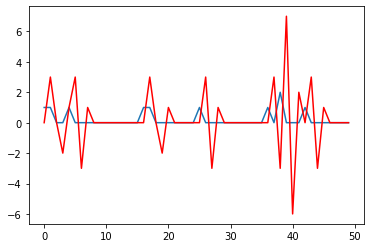

In [105]:
# split into train and test sets
society_X = SPD_subset_encodedd_grouped_year_month['SOCIETY'].values
society_size = int(len(society_X) * 0.73)
society_train, society_test = society_X[0:society_size], society_X[society_size:len(society_X)]
society_history = [x for x in society_train]
society_predictions = list()
# walk-forward validation
for t in range(len(society_test)):
    society_model = ARIMA(society_history, order=(0,3,0))
    society_model_fit = society_model.fit()
    society_output = society_model_fit.forecast()
    society_yhat = society_output[0]
    society_predictions.append(society_yhat)
    society_obs = society_test[t]
    society_history.append(society_obs)
    print('predicted=%f, expected=%f' % (society_yhat, society_obs))
# evaluate forecasts
society_rmse = np.sqrt(mean_squared_error(society_test, society_predictions))
print('Test RMSE: %.3f' % society_rmse)
# plot forecasts against actual outcomes
pyplot.plot(society_test)
pyplot.plot(society_predictions, color='red')
pyplot.show()

predicted=727.023635, expected=801.000000
predicted=671.045934, expected=791.000000
predicted=696.324346, expected=871.000000
predicted=962.773276, expected=815.000000
predicted=949.719103, expected=908.000000
predicted=894.698276, expected=914.000000
predicted=985.553052, expected=993.000000
predicted=1067.178678, expected=1068.000000
predicted=1148.605100, expected=1186.000000
predicted=1328.672607, expected=1108.000000
predicted=1132.978742, expected=1002.000000
predicted=779.992195, expected=1093.000000
predicted=974.271082, expected=959.000000
predicted=1040.328320, expected=955.000000
predicted=851.177350, expected=959.000000
predicted=922.986835, expected=861.000000
predicted=884.764845, expected=1059.000000
predicted=1074.226735, expected=950.000000
predicted=1119.820372, expected=1110.000000
predicted=1120.709246, expected=1108.000000
predicted=1178.512341, expected=1134.000000
predicted=1197.833380, expected=1134.000000
predicted=1063.276832, expected=1080.000000
predicted=10

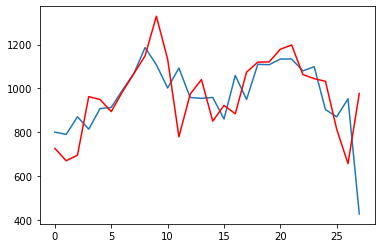

In [140]:
# split into train and test sets
property_X = SPD_subset_encodedd_grouped_year_month['PROPERTY'].values
property_size = int(len(property_X) * 0.85)
property_train, property_test = property_X[0:property_size], property_X[property_size:len(property_X)]
property_history = [x for x in property_train]
property_predictions = list()
# walk-forward validation
for t in range(len(property_test)):
    property_model = ARIMA(property_history, order=(2,3,0))
    property_model_fit = property_model.fit()
    property_output = property_model_fit.forecast()
    property_yhat = property_output[0]
    property_predictions.append(property_yhat)
    property_obs = property_test[t]
    property_history.append(property_obs)
    print('predicted=%f, expected=%f' % (property_yhat, property_obs))
# evaluate forecasts
property_rmse = np.sqrt(mean_squared_error(property_test, property_predictions))
print('Test RMSE: %.3f' % property_rmse)
# plot forecasts against actual outcomes
pyplot.plot(property_test)
pyplot.plot(property_predictions, color='red')
pyplot.show()

predicted=4956.889716, expected=4771.000000
predicted=4786.737159, expected=5033.000000
predicted=5324.423006, expected=5528.000000
predicted=6018.024063, expected=5164.000000
predicted=5165.383066, expected=4848.000000
predicted=4118.251186, expected=5304.000000
predicted=5207.021401, expected=5008.000000
predicted=5327.432114, expected=5068.000000
predicted=5030.271422, expected=4930.000000
predicted=4631.392581, expected=5029.000000
predicted=5163.803397, expected=4628.000000
predicted=4339.717257, expected=4941.000000
predicted=4966.766567, expected=4923.000000
predicted=5124.021499, expected=4526.000000
predicted=4369.371072, expected=4777.000000
predicted=4515.771315, expected=4355.000000
predicted=4227.480525, expected=4270.000000
predicted=4071.741857, expected=4417.000000
predicted=4369.675480, expected=1916.000000
Test RMSE: 725.096


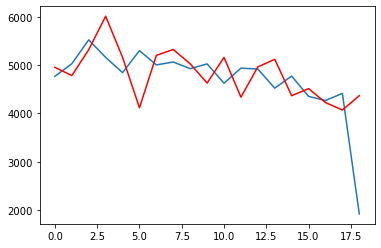

In [141]:
# split into train and test sets
people_X = SPD_subset_encodedd_grouped_year_month['PERSON'].values
people_size = int(len(people_X) * 0.9)
people_train, people_test = people_X[0:people_size], people_X[people_size:len(people_X)]
people_history = [x for x in people_train]
people_predictions = list()
# walk-forward validation
for t in range(len(people_test)):
    people_model = ARIMA(people_history, order=(2,4,1))
    people_model_fit = people_model.fit()
    people_output = people_model_fit.forecast()
    people_yhat = people_output[0]
    people_predictions.append(people_yhat)
    people_obs = people_test[t]
    people_history.append(people_obs)
    print('predicted=%f, expected=%f' % (people_yhat, people_obs))
# evaluate forecasts
people_rmse = np.sqrt(mean_squared_error(people_test, people_predictions))
print('Test RMSE: %.3f' % people_rmse)
# plot forecasts against actual outcomes
pyplot.plot(people_test)
pyplot.plot(people_predictions, color='red')
pyplot.show()

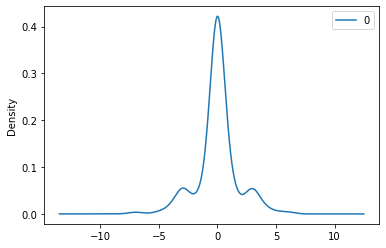

                  0
count  1.810000e+02
mean   2.821561e-17
std    1.712698e+00
min   -7.000000e+00
25%   -1.285380e-26
50%    0.000000e+00
75%    1.439049e-11
max    6.000000e+00


In [117]:
# society_model
# people_model
# # property_model

society_residuals = pd.DataFrame(society_model_fit.resid)
# density plot of residuals
society_residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(society_residuals.describe())

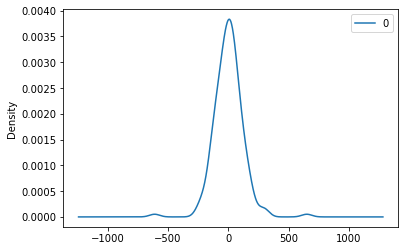

                0
count  181.000000
mean     2.263375
std    119.971959
min   -609.895742
25%    -64.184797
50%      3.110025
75%     63.939524
max    650.000000


In [118]:

property_residuals = pd.DataFrame(property_model_fit.resid)
# density plot of residuals
property_residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(property_residuals.describe())

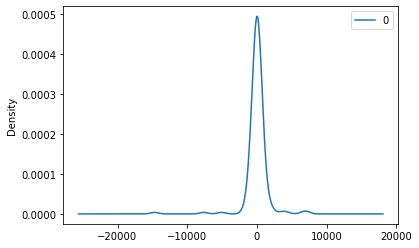

                  0
count    181.000000
mean       0.429194
std     1643.544964
min   -14677.272168
25%     -280.417797
50%       42.808560
75%      345.382314
max     7143.069799


In [119]:
people_residuals = pd.DataFrame(people_model_fit.resid)
# density plot of residuals
people_residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(people_residuals.describe())

In [120]:
people_model_fit.forecast(3)

array([4369.6754801 , 4678.86481558, 4941.04474976])

In [121]:
society_model_fit.forecast(3)

array([-1.61558713e-27, -4.84676140e-27, -9.69352281e-27])

In [122]:
property_model_fit.forecast(3)

array([ 977.11784573, 1211.82395072, 1395.69926762])